<a href="https://colab.research.google.com/github/r2klabs/CS430Repository/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression
This notebook was developed to demonstrate the fundamental concepts of Logistic Regression using SKLearn.

## Importing libraries
These are the standard libraries will will always import into our notebooks.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

These imports are specific to performing Logistic Regression using SKLearn

In [9]:
from sklearn.linear_model import LogisticRegression

These imports are for building the transformers, the pipeline, and splitting the data.

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

These imports are for various performance measures to evaluate our model.

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

This function is used to plot the confusion matrix.

In [22]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

This function is for plotting the roc_curve

In [23]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Connect to Google Drive

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Preparing the data set for an ML algorithm
The Penguin Data Set doesn't have many of the problems of a typical data set because it has already been cleaned and maintained.  Therefore, we are going to use a different data set from the UCI Machine Learning repository called the **Bank Marketing**. 

https://archive-beta.ics.uci.edu/ml/datasets/bank+marketing

This data set has a combination of categorical and numerical attributes that will allow us to perform some transformations.  Here is a summary of the data set from the UCI website.

### bank client data:
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")  
### Related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")   
  12 - duration: last contact duration, in seconds (numeric)
### Other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")  

### Output variable (desired target):
**17 - y - has the client subscribed a term deposit? (binary: "yes","no")**      

## Reading the data set

In [24]:
#Using the separator parameter because this data is separated by semicolons
df = pd.read_csv('/content/gdrive/MyDrive/CS430/bank-full.csv', sep=';')  

I don't like the name of the outcome column and the encoding is in words, I want to set to 1 (positive class) or 0 (negative class).

In [25]:
df.rename(columns={"y": "outcome"}, inplace=True)

In [26]:
df['outcome'] = df['outcome'].apply(lambda x: 1 if x == "yes" else 0)  #If the value in the row is yes, recode to 1, otherwise recode to 0.

In [27]:
df.outcome.groupby(df.outcome).count()

outcome
0    39922
1     5289
Name: outcome, dtype: int64

In [28]:
X = df.iloc[:,0:-1]
y = df[['outcome']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=32)

## Transforming the Columns

Let's transform the columns using the MinMaxScaler and the OneHotEncoder.

Determine which attributes are numerical versus for categorical for the pipeline.

In [30]:
num_attribs = ['age','balance','day','duration','campaign','pdays','previous']
cat_attribs = ['job','marital','education','default','housing','loan','contact','month','poutcome']

Set up a transformer to apply to train and test.

In [31]:
col_transform = ColumnTransformer(transformers=[
                               ('cat',OneHotEncoder(), cat_attribs),
                               ('num',MinMaxScaler(), num_attribs),]
                  )


In [37]:
pipeline = Pipeline([
                     ('trans', col_transform),
                     ('mlr', LogisticRegression(max_iter=1000)),
                     ])

In [38]:
from sklearn import set_config
set_config(display='diagram')

## Running the Logistic Regression Model

In [39]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('num', MinMaxScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous'])])),
                ('mlr', LogisticRegression(max_iter=1000))])

## Evaluating Performance of Logistic Regression

In [66]:
y_pred = pipeline.predict(X_test)

Let's plot the confusion matrix.

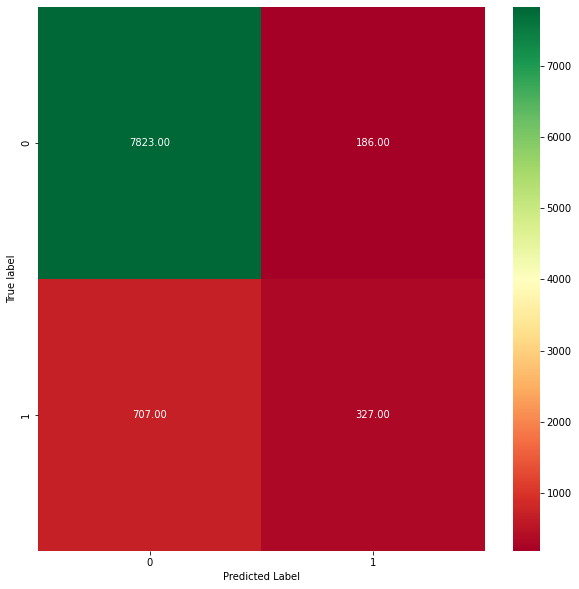

In [67]:
plot_cm(y_test,y_pred)

In [68]:
print(precision_score(y_test,y_pred)) 
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.6374269005847953
0.316247582205029
0.422753716871364


This has higher precision than recall, However, neither of them are great. the F1 measure is pretty low. Let's look at the ROC Curve and Area Under the Curve.

0.8995208002216075


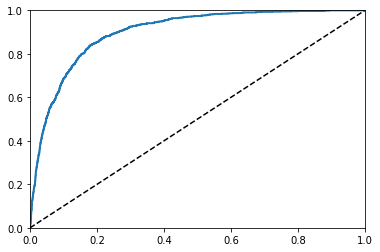

In [69]:
y_pred_proba = pipeline.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,y_pred_proba)
plot_roc_curve(fpr, tpr)
print(roc_auc_score(y_test, y_pred_proba))

Let's run the base KNN model again so we can compare.

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn_pipeline = Pipeline([
                     ('trans', col_transform),
                     ('knn', KNeighborsClassifier(n_neighbors=7)),
                     ])

In [86]:
knn_pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('num', MinMaxScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous'])])),
                ('knn', KNeighborsClassifier(n_neighbors=7))])

In [87]:
y_pred = knn_pipeline.predict(X_test)

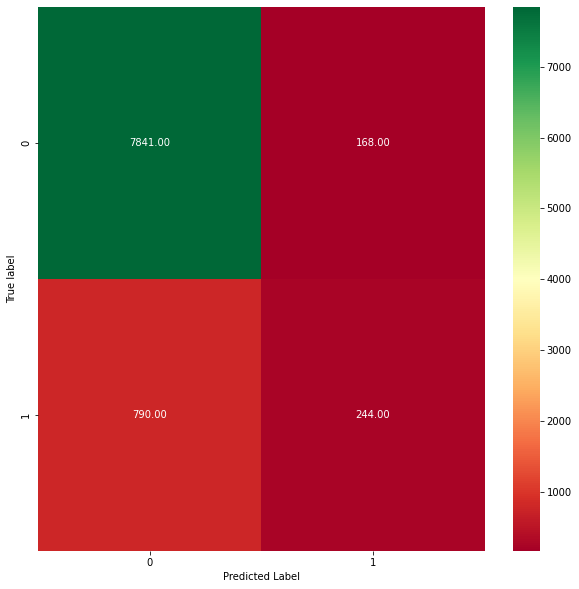

In [88]:
plot_cm(y_test,y_pred)

In [89]:
print(precision_score(y_test,y_pred)) 
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.5922330097087378
0.23597678916827852
0.33748271092669435


0.7746653728288752


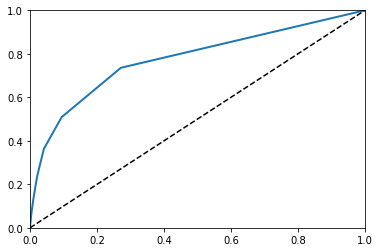

In [90]:
y_pred_proba = knn_pipeline.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,y_pred_proba)
plot_roc_curve(fpr, tpr)
print(roc_auc_score(y_test, y_pred_proba))